In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./dataset/wiki_data.csv', index_col = 0)

In [3]:
df.head(10)

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...
6,Capacity loss\n\nCapacity loss or capacity fad...
7,Carbon Recycling International\n\nCarbon Recyc...
8,Chemical Agent Resistant Coating\n\nChemical A...
9,Claas Cougar\n\nThe Claas Cougar is a self-pro...
10,"Conductive polymer\n\nConductive polymers or, ..."


In [4]:
df['text'][2]

'Battery indicator\n\nA battery indicator (also known as a battery gauge) is a device which gives information about a battery. This will usually be a visual indication of the battery\'s state of charge. It is particularly important in the case of a battery electric vehicle.\n\nSome automobiles are fitted with a battery condition meter to monitor the starter battery. This meter is, essentially, a voltmeter but it may also be marked with coloured zones for easy visualization. \n\nMany newer cars no longer offer voltmeters or ammeters; instead, these vehicles typically have a light with the outline of an automotive battery on it. This can be somewhat misleading as it may be confused for an indicator of a bad battery when in reality it indicates a problem with the vehicle\'s charging system. \n\nAlternatively, an ammeter may be fitted. This indicates whether the battery is being charged or discharged. In the adjacent picture, the ammeter is marked "Alternator" and the symbols are "C" (char

In [5]:
df.shape

(10859, 1)

In [6]:
def clean_text(data):
    # Büyük - Küçük harf
    data['text'] = data['text'].str.lower()

    # Noktalama İşaretleri
    data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)
    data['text'] = data['text'].str.replace('\n', '', regex=True)
    
    # Sayılar
    data['text'] = data['text'].str.replace(r'\d+', '', regex=True)

In [7]:
clean_text(df)

In [8]:
df.head(10)

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...
6,capacity losscapacity loss or capacity fading ...
7,carbon recycling internationalcarbon recycling...
8,chemical agent resistant coatingchemical agent...
9,claas cougarthe claas cougar is a selfpropelle...
10,conductive polymerconductive polymers or more ...


In [9]:
df['text'][2]

'battery indicatora battery indicator also known as a battery gauge is a device which gives information about a battery this will usually be a visual indication of the batterys state of charge it is particularly important in the case of a battery electric vehiclesome automobiles are fitted with a battery condition meter to monitor the starter battery this meter is essentially a voltmeter but it may also be marked with coloured zones for easy visualization many newer cars no longer offer voltmeters or ammeters instead these vehicles typically have a light with the outline of an automotive battery on it this can be somewhat misleading as it may be confused for an indicator of a bad battery when in reality it indicates a problem with the vehicles charging system alternatively an ammeter may be fitted this indicates whether the battery is being charged or discharged in the adjacent picture the ammeter is marked alternator and the symbols are c charge and d discharge both ammeters and voltm

In [10]:
# Stopwords
sw = stopwords.words('english')

In [11]:
def remove_stopwords(data):
    data['text'] = data['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [12]:
remove_stopwords(df)

In [13]:
df['text'][2]

'battery indicatora battery indicator also known battery gauge device gives information battery usually visual indication batterys state charge particularly important case battery electric vehiclesome automobiles fitted battery condition meter monitor starter battery meter essentially voltmeter may also marked coloured zones easy visualization many newer cars longer offer voltmeters ammeters instead vehicles typically light outline automotive battery somewhat misleading may confused indicator bad battery reality indicates problem vehicles charging system alternatively ammeter may fitted indicates whether battery charged discharged adjacent picture ammeter marked alternator symbols c charge discharge ammeters voltmeters individually together used assess operating state automobile battery charging systema battery indicator feature many electronic devices mobile phones battery indicator usually takes form bar graph bars showing better batterys state chargecomputers may give signal users i

In [14]:
df.head()

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [15]:
# Rare Words
temp_df = pd.Series(' '.join(df['text']).split()).value_counts()

In [16]:
temp_df

used              29034
also              22786
use               16461
â                 15383
one               15167
                  ...  
controlably           1
withpdms              1
siliconoxygen         1
functionaliesd        1
dashmounted           1
Name: count, Length: 265377, dtype: int64

In [17]:
rare_words = temp_df[temp_df < 1000]

In [18]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

In [19]:
df['text'][2]

'battery battery also known battery device information battery usually state charge particularly important case battery electric battery battery may also many cars longer offer instead vehicles typically light battery may battery problem vehicles system may whether battery c charge together used operating state battery battery feature many electronic devices mobile battery usually form better state may give signal users internal battery needs computers using generally give user operating time left battery battery system uses integrated battery provide state battery charge part system computer properties operation charge real battery battery series internal resistance battery may internal resistance increase many cases less constant voltage across internal resistance voltage charge many battery types connected system battery use possible battery types approximately constant resistance voltage across battery good capacity series resistance used used internal resistance cannot used batter

In [20]:
# Tokenization
df['text'].apply(lambda x: TextBlob(x).words)

1        [computer, services, company, based, france, f...
2        [battery, battery, also, known, battery, devic...
3        [august, â, â, june, analog, integrated, circu...
4        [military, became, april, part, allows, access...
5        [scientific, instrument, used, lower, camera, ...
                               ...                        
10855    [company, wireless, audio, technologies, consu...
10856    [input, signal, frequency, within, full, frequ...
10857    [technology, term, used, national, combination...
10858    [network, usually, system, wind, installed, si...
10859    [transfer, transfer, case, part, multiple, pow...
Name: text, Length: 10859, dtype: object

In [21]:
# Lemmatization
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [22]:
df['text']

1        computer service company based france founded ...
2        battery battery also known battery device info...
3        august â â june analog integrated circuit desi...
4        military became april part allows access knowl...
5        scientific instrument used lower camera turn l...
                               ...                        
10855    company wireless audio technology consumer com...
10856    input signal frequency within full frequency r...
10857    technology term used national combination sate...
10858    network usually system wind installed six remo...
10859    transfer transfer case part multiple powered v...
Name: text, Length: 10859, dtype: object

### 2. Metin Görselleştirme

#### Terim Frekanslarının Hesaplanması


In [25]:
tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [26]:
tf.columns = ['words', 'tf']
tf.sort_values('tf', ascending = False)
tf.head()

,words,tf
0,service,7794.0
1,company,13317.0
2,computer,6595.0
3,based,5533.0
4,france,1084.0


#### Barplot

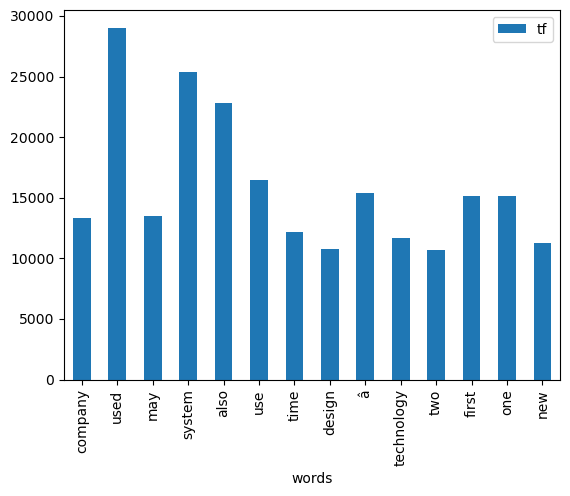

In [28]:
tf[tf['tf'] > 10000].plot.bar(x = 'words', y = 'tf')
plt.show()

#### WordCloud

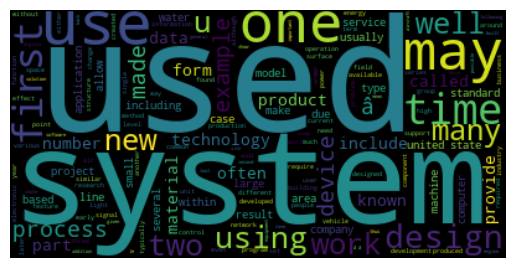

In [30]:
text = " ".join(i for i in df.text)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<hr>

In [32]:
def preprocess(data, plot = False):
    data['text'] = data['text'].str.lower()

    # Noktalama İşaretleri
    data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)
    data['text'] = data['text'].str.replace('\n', '', regex=True)
    
    # Sayılar
    data['text'] = data['text'].str.replace(r'\d+', '', regex=True)

    # Stopwords
    data['text'] = data['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

    # Rarewords
    temp_df = pd.Series(' '.join(df['text']).split()).value_counts()
    data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

    # Lemmatization
    data['text'] = data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    if plot:
        text = " ".join(i for i in df.text)
        wordcloud = WordCloud().generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

In [33]:
df = pd.read_csv('./dataset/wiki_data.csv', index_col = 0)

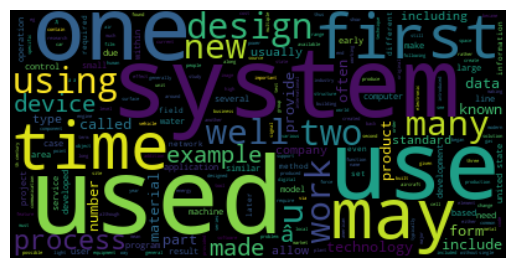

In [34]:
preprocess(df, plot = True)

In [35]:
df.head()

,text
1,computer service company based france founded ...
2,battery battery also known battery device info...
3,august â â june analog integrated circuit desi...
4,military became april part allows access knowl...
5,scientific instrument used lower camera turn l...
